In [49]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [50]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [51]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [52]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [53]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
scaler = StandardScaler()

# Fit the scaler to the data and transform it
scaled_data = scaler.fit_transform(df_market_data)

# Convert the scaled data back to a DataFrame
df_scaled = pd.DataFrame(scaled_data, columns=df_market_data.columns, index=df_market_data.index)

# Print
df_scaled.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


---

### Find the Best Value for k Using the Original Data.

In [54]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))

In [55]:
# Create an empty list to store the inertia values
wcss = []

# Create a for loop to compute the inertia with each possible value of k
for k in range(1, 12):
    
# Inside the loop:    
# 1. Create a KMeans model using the loop counter for the n_clusters
    kmeans = KMeans(n_clusters=k, random_state=0)

# 2. Fit the model to the data using `df_market_data_scaled`
    kmeans.fit(df_scaled)
    
# 3. Append the model.inertia_ to the inertia list
    wcss.append(kmeans.inertia_)

C:\Users\lnata\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\lnata\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\lnata\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\lnata\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

In [56]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {'k': k_values, 'inertia': wcss}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)

# Print
df_elbow.head()

,k,inertia
0,1,287.000000
1,2,195.820218
2,3,123.190482
3,4,79.022435
4,5,65.302379


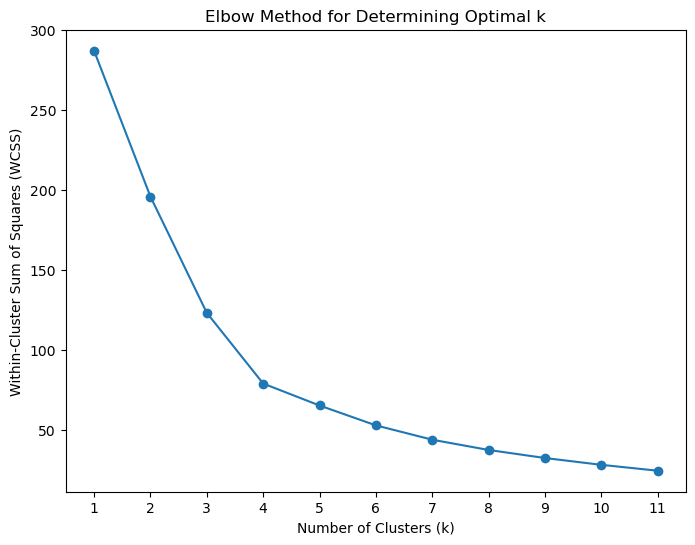

In [57]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.

plt.figure(figsize=(8, 6))
plt.plot(df_elbow['k'], df_elbow['inertia'], marker='o')
plt.title('Elbow Method for Determining Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.xticks(k_values)
plt.show()

#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** The best value for 'k' is 4 because it is where the decrease in WCSS starts to slow down significantly.

---

### Cluster Cryptocurrencies with K-means Using the Original Data

In [58]:
# Initialize the K-Means model using the best value for k
optimal_k = 4
kmeans_model = KMeans(n_clusters=optimal_k, random_state=0)

In [59]:
# Fit the K-Means model using the scaled data
kmeans_model.fit(df_scaled)

C:\Users\lnata\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\lnata\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=0)

In [60]:
# Predict the clusters to group the cryptocurrencies using the scaled data
clusters = kmeans_model.predict(df_scaled)


# Print the resulting array of cluster values.
print(clusters)

[0 0 3 3 0 0 0 0 0 3 3 3 3 0 3 0 3 3 0 3 3 0 3 3 3 3 3 3 0 3 3 3 1 0 3 3 2
 3 3 3 3]


In [61]:
# Create a copy of the DataFrame
df_copy = df_scaled.copy()

In [62]:
# Add a new column to the DataFrame with the predicted clusters
df_copy['Predicted_Cluster'] = clusters

# Display sample data
df_copy.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,Predicted_Cluster
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,0
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,0
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,3
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,3
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,0


In [63]:
# Create a scatter plot using hvPlot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.

scatter_plot = df_copy.hvplot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    by="Predicted_Cluster",
    hover_cols=[df_copy.index.name],
    width=800,
    height=500,
)

scatter_plot

:NdOverlay   [Predicted_Cluster]
   :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coin_id)

---

### Optimize Clusters with Principal Component Analysis.

In [64]:
# Create a PCA model instance and set `n_components=3`.
pca_model = PCA(n_components=3)

In [65]:
# Use the PCA model with `fit_transform` to reduce to 
# three principal components.
pca_transformed_data = pca_model.fit_transform(df_copy.drop(columns=['Predicted_Cluster']))

# View the first five rows of the DataFrame. 
df_copy.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,Predicted_Cluster
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,0
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,0
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,3
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,3
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,0


In [66]:
# Retrieve the explained variance to determine how much information 
# can be attributed to each principal component.
explained_variance = pca_model.explained_variance_ratio_
explained_variance

array([0.3719856 , 0.34700813, 0.17603793])

In [67]:
# Calculate the total explained variance of the three principal components
total_explained_variance = sum(explained_variance)
total_explained_variance

0.8950316570309841

#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** The total explained variance of the three principal components is approximately 0.8900, which means that these three principal components collectively explain around 89.00% of the variance in the data.

In [68]:
# Creating a DataFrame with the PCA data
df_pca_data = pd.DataFrame(pca_transformed_data, columns=['PCA1', 'PCA2', 'PCA3'], index=df_copy.index)

# Copy the crypto names from the original data


# Set the coinid column as index
df_pca_data.index.name = 'coin_id'

# Display sample data
df_pca_data.head()

,PCA1,PCA2,PCA3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


---

### Find the Best Value for k Using the PCA Data

In [69]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))

In [70]:
# Create an empty list to store the inertia values
wcss = []

# Create a for loop to compute the inertia with each possible value of k
for k in k_values:
    
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
    kmeans = KMeans(n_clusters=k, random_state=0)

# 2. Fit the model to the data using `df_market_data_pca`
    kmeans.fit(df_pca_data)

# 3. Append the model.inertia_ to the inertia list
    wcss.append(kmeans.inertia_)

C:\Users\lnata\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\lnata\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\lnata\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\lnata\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

In [71]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data_pca = {'k': k_values, 'inertia': wcss}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow_pca = pd.DataFrame(elbow_data_pca)

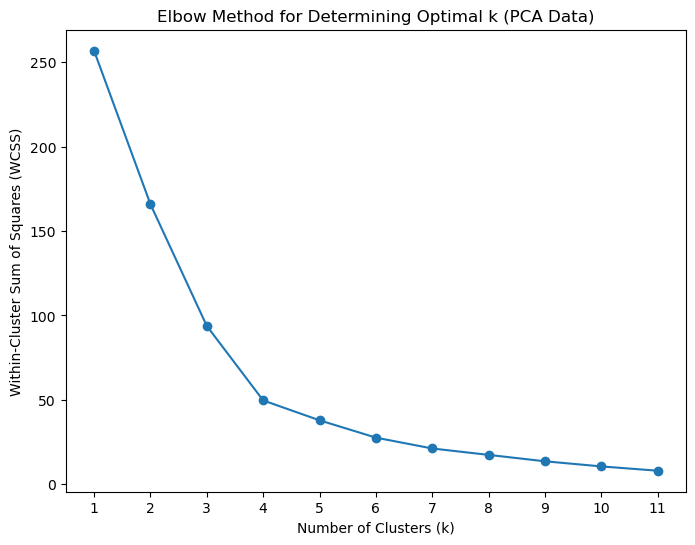

In [72]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.

plt.figure(figsize=(8, 6))
plt.plot(df_elbow_pca['k'], df_elbow_pca['inertia'], marker='o')
plt.title('Elbow Method for Determining Optimal k (PCA Data)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.xticks(k_values)
plt.show()

#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** The best value for 'k' when using the PCA data is at the elbow point which is 4 to 5.


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** Yes, the optimal k value obtained from the PCA data differs from the best k value found using the original data. The original data suggested k = 4, whereas the PCA data suggests k = 4 to 5. Since it is performed by the PCA, it can alter the structure of the data and affect the clustering results.

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [73]:
# Initialize the K-Means model using the best value for k
best_k_pca = 4  
kmeans_model_pca = KMeans(n_clusters=best_k_pca, random_state=0)

In [74]:
# Fit the K-Means model using the PCA data
kmeans_model_pca.fit(df_pca_data)

C:\Users\lnata\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\lnata\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=0)

In [75]:
# Predict the clusters to group the cryptocurrencies using the PCA data
clusters_pca = kmeans_model_pca.predict(df_pca_data)

# Print the resulting array of cluster values.
print(clusters_pca)

[0 0 3 3 0 0 0 0 0 3 3 3 3 0 3 0 3 3 0 3 3 0 3 3 3 3 3 3 0 3 3 3 1 0 3 3 2
 3 3 3 3]


In [76]:
# Create a copy of the DataFrame with the PCA data
df_pca_copy = df_pca_data.copy()

# Add a new column to the DataFrame with the predicted clusters
df_pca_copy['Predicted_Cluster'] = clusters_pca

# Display sample data
df_pca_copy.head()

,PCA1,PCA2,PCA3,Predicted_Cluster
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,0
ethereum,-0.458261,0.458466,0.952877,0
tether,-0.433070,-0.168126,-0.641752,3
ripple,-0.471835,-0.222660,-0.479053,3
bitcoin-cash,-1.157800,2.041209,1.859715,0


In [77]:
# Create a scatter plot using hvPlot by setting 
# `x="PC1"` and `y="PC2"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.

scatter_plot_pca = df_pca_copy.hvplot.scatter(
    x='PCA1',
    y='PCA2',
    by='Predicted_Cluster',
    hover_cols=[df_pca_copy.index.name],
    width=800,
    height=500,
)

# Display the scatter plot
scatter_plot_pca

:NdOverlay   [Predicted_Cluster]
   :Scatter   [PCA1]   (PCA2,coin_id)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

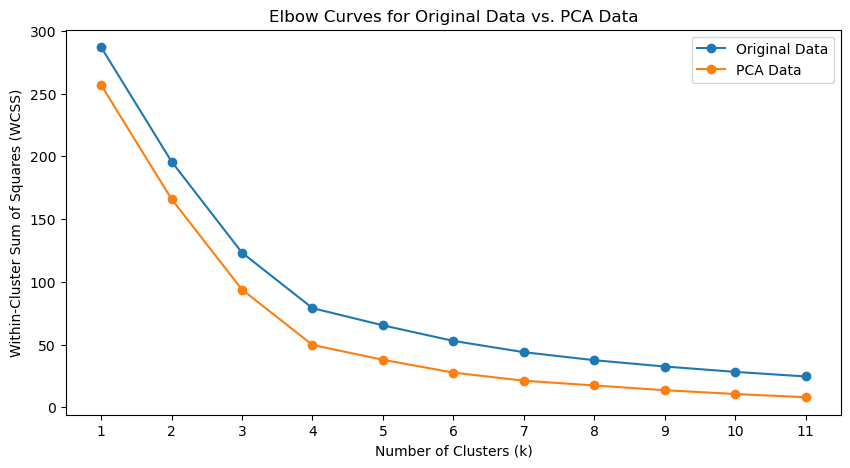

In [78]:
# Composite plot to contrast the Elbow curves

# Plot the Elbow curve for the original data
plt.figure(figsize=(10, 5))
plt.plot(df_elbow['k'], df_elbow['inertia'], marker='o', label='Original Data')

# Plot the Elbow curve for the PCA-transformed data
plt.plot(df_elbow_pca['k'], df_elbow_pca['inertia'], marker='o', label='PCA Data')

# Add labels and title
plt.title('Elbow Curves for Original Data vs. PCA Data')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.xticks(k_values)
plt.legend()
plt.show()

In [79]:
# Composite plot to contrast the clusters

# Visualize the clusters for the original data
scatter_plot = df_copy.hvplot.scatter(
    x=df_copy.columns[0],
    y=df_copy.columns[1],
    by='Predicted_Cluster',
    hover_cols=[df_copy.index.name],
    width=400,
    height=300,
    title='Clusters for Original Data'
)

# Visualize the clusters for the PCA-transformed data
scatter_plot_pca = df_pca_copy.hvplot.scatter(
    x=df_pca_copy.columns[0],
    y=df_pca_copy.columns[1],
    by='Predicted_Cluster',
    hover_cols=[df_pca_copy.index.name],
    width=400,
    height=300,
    title='Clusters for PCA Data'
)

# Composite plot to contrast the clusters
composite_plot = scatter_plot + scatter_plot_pca
composite_plot.cols(2)

:Layout
   .NdOverlay.I  :NdOverlay   [Predicted_Cluster]
      :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coin_id)
   .NdOverlay.II :NdOverlay   [Predicted_Cluster]
      :Scatter   [PCA1]   (PCA2,coin_id)

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** Using fewer features to cluster the data with K-Means, as shown through PCA dimensionality reduction, simplifies the data, making it easier to visualize and analyze. However, this simplification may result in less accurate clustering and could make it harder to distinguish between different groups in the data.